In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
import scipy.misc as misc

['H:\\predict_v3\\inp_three_well_092_image.png', 'H:\\predict_v3\\gt_three_well_092_image.png', 'H:\\predict_v3\\pred_three_well_092_image.png']


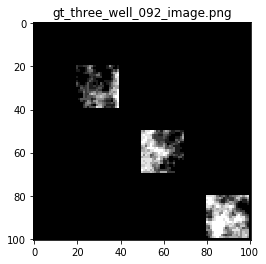

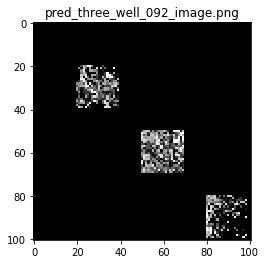

In [7]:
log_path = r'C:\Users\today459\PycharmProjects\CTDataSegmentation_split\logs\ctdata'
log_path = r'H:\Validation_qcut_10_iter_1000'
log_path = r'C:\Users\today459\PycharmProjects\CTDataSegmentation_split\logs\three_well'
log_path = r'H:\predict_v3'


num_list = ['092_image']
# num_list = ['01_071_train']

def gt_img(num):
    return ('gt_three_well_%s.png' %(num))
def inp_img(num):
    return ('inp_three_well_%s.png' %(num))
def pred_img(num):
    return ('pred_three_well_%s.png' %(num))

image_list = []
for num in num_list:
    image_list.append(inp_img(num))
    image_list.append(gt_img(num))
    image_list.append(pred_img(num))
    
image_path=[]
image_path = [os.path.join(log_path, image) for image in image_list ]

print(image_path)

index=1
img = misc.imread(image_path[index])
imgplot = plt.imshow(img, cmap=cm.gray)
plt.title(image_list[index])
plt.show()

index=2
img = misc.imread(image_path[index])
plt.title(image_list[index])
imgplot = plt.imshow(img, cmap=cm.gray)
plt.show()



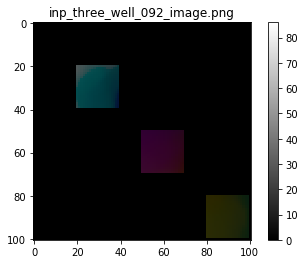

In [8]:
index=0
img = misc.imread(image_path[index])
imgplot = plt.imshow(img, cmap=cm.gray)
plt.title(image_list[index])
plt.colorbar()
plt.show()

# difference with annotation and preidction

0.8960886187628664


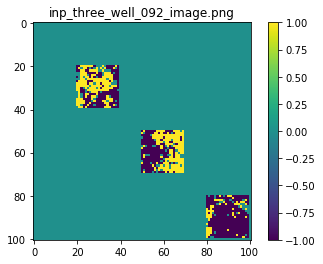

In [9]:
img_gt = misc.imread(image_path[1]).flatten()
img_pre = misc.imread(image_path[2]).flatten()
miss_cnt=0
diff_list=[]
for idx, pixel in enumerate(img_gt):
    if pixel != img_pre[idx]:
        miss_cnt = miss_cnt + 1
    if pixel < img_pre[idx]:
        diff_list.append(1)
    elif pixel > img_pre[idx]:
        diff_list.append(-1)
    else:
        diff_list.append(0)

print(1 - (miss_cnt/len(img_gt)))
plt.imshow(np.array(diff_list).reshape(101, 101))
title = (image_list[0])
plt.title(title)
plt.colorbar()
plt.show()

# accuracy

In [15]:
p_03_079 =  misc.imread('H:\\Validation_qcut_10_iter_1000\\pred_three_well_03_079_train.png').flatten()
p_02_085 = misc.imread('H:\\Validation_qcut_10_iter_1000\\pred_three_well_02_085_train.png').flatten()

miss_cnt=0
for idx, pixel in enumerate(p_03_079):
    if pixel != p_02_085[idx]:
        miss_cnt = miss_cnt + 1

print(1 - (miss_cnt/len(img_gt)))

0.9763748652092932


# loss calculate

In [124]:
import tensorflow as tf;      

index=1
img_gt = misc.imread(image_path[index])
index=2
img_pred = misc.imread(image_path[index]).reshape(101,101,1)

# print(np.ndim(img_gt), np.ndim(img_pred))
# print(img_gt,img_pred)

y4 = tf.convert_to_tensor(img_gt, dtype=tf.int64)
y_4 = tf.convert_to_tensor(img_pred, dtype=tf.float32)   
print(np.ndim(y4), np.ndim(y_4))

# c4 = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y_4, labels=y4)

y4 = tf.convert_to_tensor([[0, 1, 0, 0]], dtype=tf.int64)    
y_4 = tf.convert_to_tensor([[-1, -1.7, 1, 0.1]], dtype=tf.float32)   
print(np.shape(y4), tf.argmax(y4, 1))
c4 = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y_4, labels=tf.argmax(y4, 1))    

# print(tf.argmax(y_4, 1))

with tf.Session() as sess:    
    print('c4: %s' % sess.run(c4))   


0 0
(1, 4) Tensor("ArgMax_16:0", shape=(1,), dtype=int64)
c4: [ 3.17568159]
